#**Author :- Maulik Mangukiya**
**Topic :-Task 7- Stock Market Prediction using Numerical and Textual Analysis (Level - Advanced).**

*This project is a task for the GRIP Data Science Internship at the Sparks Foundation:-*

**Objective:**


*  Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
*  Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
*  Download historical stock prices from finance.yahoo.com
*  Download textual (news) data from https://bit.ly/36fFPI6
*  Use either R or Python, or both for separate analysis and then combine the findings to create a hybrid model
*  You are free to select a different stock to analyze and news dataset as well while not changing the objective of the task.



Importing the required libraries.

In [1]:
# For handling the data
import pandas as pd
import numpy as np 
import math

# For preparing the plots
import matplotlib.pyplot as plt
import seaborn as sns 

# For building the model
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import RegressorChain
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# For building layers
from keras.models import sequential
from keras.layers import Dense,LSTM ,Dropout,Activation

import nltk 
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import*

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
!pip install yfinance
import yfinance as yf
bse_data = yf.download('^BSESN', start='2014-01-01', end='2020-06-30')
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)


In [6]:
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [7]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1585 entries, 2014-01-01 to 2020-06-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1585 non-null   float64
 1   high      1585 non-null   float64
 2   low       1585 non-null   float64
 3   close     1585 non-null   float64
 4   adjclose  1585 non-null   float64
 5   volume    1585 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 86.7 KB


In [8]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2020-06-30 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [9]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2014-01-01,21222.189453,21244.349609,21133.820312,21140.480469,21140.480469,4000
2014-01-02,21179.910156,21331.320312,20846.669922,20888.330078,20888.330078,9300
2014-01-03,20819.580078,20885.179688,20731.330078,20851.330078,20851.330078,9300
2014-01-06,20913.789062,20913.789062,20721.980469,20787.300781,20787.300781,7600
2014-01-07,20845.769531,20890.480469,20637.179688,20693.240234,20693.240234,8100


In [10]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [11]:
bse_data.reset_index(inplace=True)

In [12]:
bse_data.rename(columns={'Date': 'date'}, inplace = True)

In [13]:
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2014-01-01,21222.189453,21244.349609,21133.820312,21140.480469,21140.480469,4000
1,2014-01-02,21179.910156,21331.320312,20846.669922,20888.330078,20888.330078,9300
2,2014-01-03,20819.580078,20885.179688,20731.330078,20851.330078,20851.330078,9300
3,2014-01-06,20913.789062,20913.789062,20721.980469,20787.300781,20787.300781,7600
4,2014-01-07,20845.769531,20890.480469,20637.179688,20693.240234,20693.240234,8100


In [14]:
unseenbse_data.reset_index(inplace=True)

In [15]:
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)

In [16]:
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [17]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')

In [18]:
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')

In [19]:
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
print("Actual Proce of the Stock ",unseenbsedata_price) 

Actual Proce of the Stock  0    34987.5
dtype: float64


##**Rolling window analysis of time series**
Creating 4,16, 52 week moving average of closing price of BSE index


In [20]:
def stock_weekmovingavg(wks,df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

In [21]:
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2014-01-29,20647.300781,21001.966113
2014-01-30,20498.250000,20977.307129
2014-01-31,20513.849609,20957.803125
2014-02-03,20209.259766,20940.929102
2014-02-04,20211.929688,20912.027051


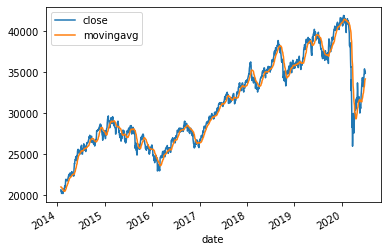

In [22]:
stock_weekmovingavg(4, bse_data).plot()

In [23]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


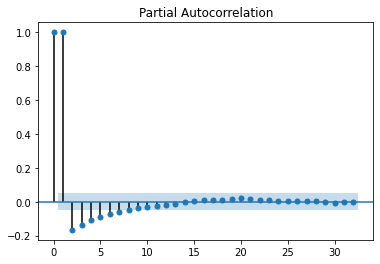

In [24]:
import statsmodels.api as sm
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) 
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

In [25]:
stock_weekmovingavg(16, bse_data).head()

,close,movingavg
date,,
2014-05-02,22403.890625,21427.873389
2014-05-05,22445.119141,21443.666016
2014-05-06,22508.419922,21463.125879
2014-05-07,22323.900391,21483.839502
2014-05-08,22344.039062,21503.046997


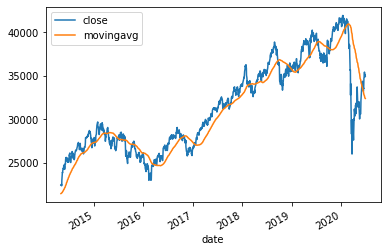

In [26]:
stock_weekmovingavg(16, bse_data).plot()

In [27]:
altdata_sixteenweek = stock_weekmovingavg(16, bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)

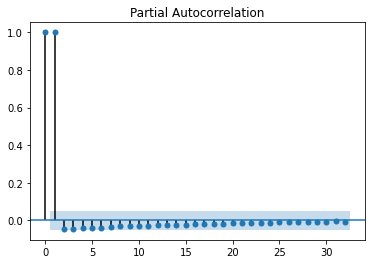

In [28]:
plotsixteenweek = altdata_sixteenweek.filter(['date', 'movingavg'], axis=1) 
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_sixteenweek['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

In [29]:
stock_weekmovingavg(52, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,24899.195425
2015-02-03,29000.140625,24929.894614
2015-02-04,28883.109375,24961.093885
2015-02-05,28850.970703,24991.985344
2015-02-06,28717.910156,25022.999459


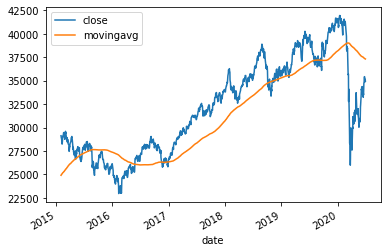

In [30]:
stock_weekmovingavg(52, bse_data).plot()

In [31]:
altdata_fiftytwoweek = stock_weekmovingavg(52, bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)

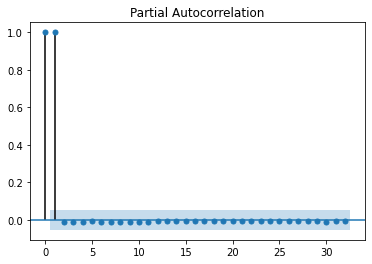

In [32]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['date', 'movingavg'], axis=1)
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fiftytwoweek['date']))) 
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

###**Creating a rolling window of size 10 and 50 of the BSE index**

In [33]:
def rollingwindows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1) 
  data.set_index('date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()

In [34]:
rollingwindows(10, bse_data).head()

,open,high,low,close
date,,,,
2014-01-15,20923.064844,21012.473047,20789.660938,20872.901367
2014-01-16,20909.991992,21018.311133,20785.425000,20887.802344
2014-01-17,20928.691992,21023.108008,20820.723047,20925.487305
2014-01-20,20970.399023,21061.600977,20849.150977,20946.716211
2014-01-21,20987.373047,21092.358984,20877.066016,20988.491211


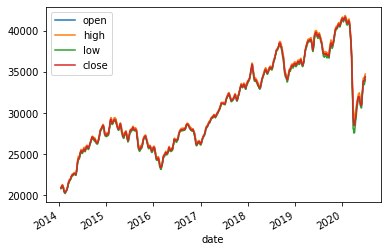

In [35]:
rollingwindows(10, bse_data).plot()

In [36]:
altdata_tendays = rollingwindows(10, bse_data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'}, inplace=True)

In [37]:
rollingwindows(50, bse_data).head()

,open,high,low,close
date,,,,
2014-03-13,20880.482539,20977.292617,20772.581406,20881.771250
2014-03-14,20890.770938,20992.232812,20784.307617,20894.453828
2014-03-18,20900.133750,21002.672813,20798.843828,20912.883242
2014-03-19,20920.735156,21025.783633,20819.924844,20932.508828
2014-03-20,20939.912969,21045.424453,20841.125430,20953.420000


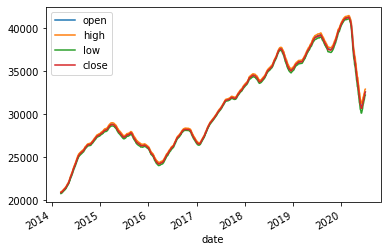

In [38]:
rollingwindows(50, bse_data).plot()

In [39]:
altdata_fiftydays = rollingwindows(50, bse_data)
altdata_fiftydays.reset_index(inplace=True)
altdata_fiftydays.rename(columns={list(altdata_fiftydays)[0]:'date'}, inplace=True)

###**Creating the dummy time series:**
Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [40]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1)
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [41]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2014-01-02,132.500000,1
2014-01-03,0.000000,0
2014-01-06,-18.279570,0
2014-01-07,6.578947,0
2014-01-08,-1.234568,0
...,...,...
2020-06-23,0.398406,0
2020-06-24,5.555556,0
2020-06-25,-7.518797,0


In [42]:
altdata_volpercentchg = boolean_shock(10, bse_data, 'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)

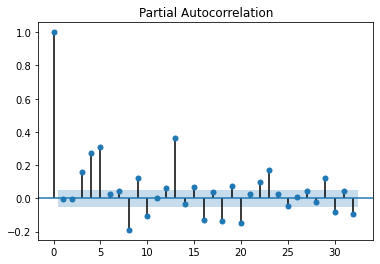

In [43]:
plotvolpercentchg = altdata_volpercentchg.filter(['date', 'percentchg'], axis=1) 
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

In [44]:
boolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2014-01-02,-1.192737,0
2014-01-03,-0.177132,0
2014-01-06,-0.307075,0
2014-01-07,-0.452490,0
2014-01-08,0.174649,0
...,...,...
2020-06-23,1.486937,0
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0


In [45]:
altdata_closepercentchg2 = boolean_shock(2, bse_data, 'close')
altdata_closepercentchg2.reset_index(inplace=True)
altdata_closepercentchg2.rename(columns={list(altdata_closepercentchg2)[0]:'date'}, inplace=True)

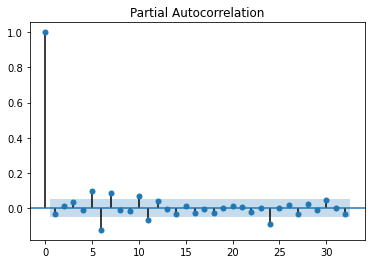

In [46]:
plotclosepercentchg2 = altdata_closepercentchg2.filter(['date', 'percentchg'], axis=1) 
plotclosepercentchg2.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg2['date']))) 
del plotclosepercentchg2['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg2.values.squeeze())
plt.show()

In [47]:
boolean_shock(10, bse_data, 'close')

,percentchg,shock
date,,
2014-01-02,-1.192737,0
2014-01-03,-0.177132,0
2014-01-06,-0.307075,0
2014-01-07,-0.452490,0
2014-01-08,0.174649,0
...,...,...
2020-06-23,1.486937,0
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0


In [48]:
altdata_closepercentchg10 = boolean_shock(10, bse_data, 'close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'}, inplace=True)

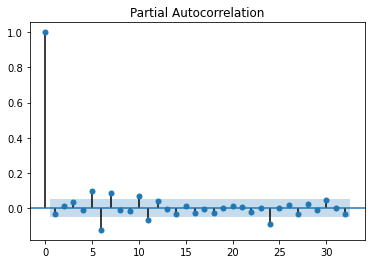

In [49]:
plotclosepercentchg10 = altdata_closepercentchg10.filter(['date', 'percentchg'], axis=1)
plotclosepercentchg10.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg10['date']))) 
del plotclosepercentchg10['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg10.values.squeeze())
plt.show()

###**Pricing shock without volume shock**

In [50]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) 
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [51]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2014-01-01,21172.883464,0
2014-01-02,21022.106771,0
2014-01-03,20822.613281,0
2014-01-06,20807.690104,0
2014-01-07,20740.300130,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [52]:
altdata_pricepercentchg = priceboolean_shock(10, bse_data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)

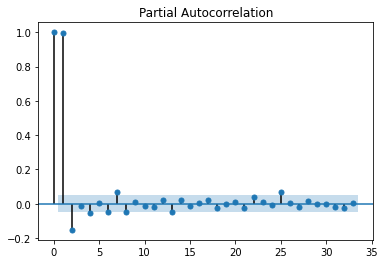

In [53]:
plotpricepercentchg = altdata_pricepercentchg.filter(['date', 'priceavg'], axis=1) #df.copy()
plotpricepercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_pricepercentchg['date']))) 
del plotpricepercentchg['date']
sm.graphics.tsa.plot_pacf(plotpricepercentchg.values.squeeze())
plt.show()

##**Creating the reverse dummy time series:**

Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [54]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [55]:
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2014-01-01,1.207135,0
2014-01-02,0.177447,0
2014-01-03,0.308021,0
2014-01-06,0.454547,0
2014-01-07,-0.174345,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


In [56]:
altdata_closepercentchg = reverseboolean_shock(2, bse_data, 'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)

Pricing black swan : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [57]:
reverseboolean_shock(5, bse_data, 'close')

,percentchg,shock
date,,
2014-01-01,1.207135,0
2014-01-02,0.177447,0
2014-01-03,0.308021,0
2014-01-06,0.454547,0
2014-01-07,-0.174345,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


In [58]:
altdata_closepercentchg5 = reverseboolean_shock(5, bse_data, 'close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'}, inplace=True)

Pricing shock without volume shock : Now we will be creating a time series for pricing shock without volume shock based on whether price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [59]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [60]:
pricereverseboolean_shock(2, bse_data)

,reversepriceavg,shock
date,,
2014-01-01,21172.883464,0
2014-01-02,21022.106771,0
2014-01-03,20822.613281,0
2014-01-06,20807.690104,0
2014-01-07,20740.300130,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [61]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, bse_data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)

##**Textual Analysis of news from Times of India News Headlines**

In [65]:
news  = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

In [66]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [67]:
news.shape

(3424067, 3)

In [68]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [69]:
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [70]:
news['headline_category'].value_counts()

india                                           288541
unknown                                         209582
city.mumbai                                     134428
city.delhi                                      127717
business.india-business                         116761
                                                 ...  
sports.hockey.hockey-india-league.interviews         8
sports.cricket.sri-lanka-in-new-zealand              8
best-products.beauty.grooming                        8
mahindra-cars                                        8
himachal-pradesh                                     8
Name: headline_category, Length: 1013, dtype: int64

In [71]:
news['headline_category'].value_counts().count()

1013

In [72]:
news['headline_text'].value_counts()

Straight Answers                                                                                      6723
Cartoons                                                                                              1536
Straight answers                                                                                      1500
Photogallery                                                                                          1353
Your say                                                                                              1012
                                                                                                      ... 
Centre funds construction of 74 school toilets in Goa                                                    1
'Teri Wargi' featuring H Dhami and Garry Sandhu                                                          1
Government moots IT cadre in police                                                                      1
activist arrested for metro planners 

In [73]:
news['headline_text'].value_counts().count()

3168800

In [74]:
news.isnull().sum().sum()

0

In [75]:
news.duplicated().sum()

24191

In [76]:
news.duplicated(keep=False).sum()

46130

In [77]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [78]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,America's unwanted heading for India?
5,20010102,unknown,America's unwanted heading for India?
6,20010102,unknown,America's unwanted heading for India?
9,20010102,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,20201227,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,20201228,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,20201228,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,20201229,city.pune,PMC to draft separate DP after 23 villages' me...


In [79]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [80]:
news.duplicated().sum()

0

In [81]:
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y %m %d')
news

,publish_date,headline_category,headline_text
0,1970-01-01 00:00:00.020010102,entertainment.hindi.bollywood,Raju Chacha
1,1970-01-01 00:00:00.020010102,unknown,A noisy effort to spruce up Commercial Street
2,1970-01-01 00:00:00.020010102,unknown,Akki-Alur and Ranebennur peaceful
3,1970-01-01 00:00:00.020010102,unknown,America's unwanted heading for India?
4,1970-01-01 00:00:00.020010102,unknown,Auto driver's murder: 4 held
...,...,...,...
3399871,1970-01-01 00:00:00.020201231,world.china,25 days that changed the world: How Covid-19 s...
3399872,1970-01-01 00:00:00.020201231,world.pakistan,Pakistan: Destruction of Hindu temple condemned
3399873,1970-01-01 00:00:00.020201231,world.pakistan,US ready to try Pearl killers if Pakistan cour...
3399874,1970-01-01 00:00:00.020201231,world.rest-of-world,Yemen airport blasts kill 26 as government pla...


In [82]:
from textblob import TextBlob

In [83]:
polarity = []
subjectivity = []
for idx, row in news.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [85]:
news['polarity'] = polarity
news['subjectivity'] = subjectivity

In [86]:
news.head()

,publish_date,headline_category,headline_text,polarity,subjectivity
0,1970-01-01 00:00:00.020010102,entertainment.hindi.bollywood,Raju Chacha,0.00,0.0
1,1970-01-01 00:00:00.020010102,unknown,A noisy effort to spruce up Commercial Street,0.00,0.0
2,1970-01-01 00:00:00.020010102,unknown,Akki-Alur and Ranebennur peaceful,0.25,0.5
3,1970-01-01 00:00:00.020010102,unknown,America's unwanted heading for India?,0.00,0.0
4,1970-01-01 00:00:00.020010102,unknown,Auto driver's murder: 4 held,0.00,0.0


In [87]:
news.tail()

,publish_date,headline_category,headline_text,polarity,subjectivity
3399871,1970-01-01 00:00:00.020201231,world.china,25 days that changed the world: How Covid-19 s...,0.000000,0.000000
3399872,1970-01-01 00:00:00.020201231,world.pakistan,Pakistan: Destruction of Hindu temple condemned,0.000000,0.000000
3399873,1970-01-01 00:00:00.020201231,world.pakistan,US ready to try Pearl killers if Pakistan cour...,0.100000,0.250000
3399874,1970-01-01 00:00:00.020201231,world.rest-of-world,Yemen airport blasts kill 26 as government pla...,0.000000,0.000000
3399875,1970-01-01 00:00:00.020201231,world.uk,No proof of new variant causing more fatality;...,0.318182,0.477273


In [88]:
news.isnull().sum().sum()

0

In [89]:
news.rename(columns={'publish_date': 'date'}, inplace = True)

In [90]:
news = news.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [91]:
news.head()

,date,polarity,subjectivity
0,1970-01-01 00:00:00.020010102,0.00,0.0
1,1970-01-01 00:00:00.020010102,0.00,0.0
2,1970-01-01 00:00:00.020010102,0.25,0.5
3,1970-01-01 00:00:00.020010102,0.00,0.0
4,1970-01-01 00:00:00.020010102,0.00,0.0


In [92]:
news.shape

(3399876, 3)

In [93]:
news['date'].duplicated().sum()

3392614

In [94]:
bse_data.shape

(1585, 7)

In [95]:
bse_data['date'].duplicated().sum()

0

In [96]:
bse_data = pd.merge(bse_data, news, how='left', on=['date'])

In [97]:
bse_data.shape

(1585, 9)

In [98]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity'],
      dtype='object')

In [99]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2014-01-01,21222.189453,21244.349609,21133.820312,21140.480469,21140.480469,4000,NaN,NaN
1,2014-01-02,21179.910156,21331.320312,20846.669922,20888.330078,20888.330078,9300,NaN,NaN
2,2014-01-03,20819.580078,20885.179688,20731.330078,20851.330078,20851.330078,9300,NaN,NaN
3,2014-01-06,20913.789062,20913.789062,20721.980469,20787.300781,20787.300781,7600,NaN,NaN
4,2014-01-07,20845.769531,20890.480469,20637.179688,20693.240234,20693.240234,8100,NaN,NaN


In [100]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1580,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200,NaN,NaN
1581,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600,NaN,NaN
1582,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600,NaN,NaN
1583,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800,NaN,NaN
1584,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300,NaN,NaN


In [101]:
bse_data.isnull().sum().sum()

3170

##**Preparing the dataset for machine learning**


In [102]:
bse_data.loc[len(bse_data)] = ['2021-12-29', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), news['polarity'].mean(), news['subjectivity'].mean()]

In [103]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")

In [104]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1581,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,NaN,NaN
1582,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600.0,NaN,NaN
1583,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,NaN,NaN
1584,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,NaN,NaN
1585,2021-12-29,30911.970669,31055.541558,30699.079423,30869.059612,30869.059612,12000.0,0.026103,0.158328


In [105]:
bse_data["month"] = bse_data['date'].dt.month
bse_data["day"] = bse_data['date'].dt.day
bse_data["dayofweek"] = bse_data['date'].dt.dayofweek
bse_data["week"] = bse_data['date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverseboolean_shock(10, bse_data, 'close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(priceboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(pricereverseboolean_shock(2, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['high'] + bse_data['low'] + bse_data['close']) / 3 , 2)
bse_data['close'] = round(bse_data['close'] , 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [106]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'price'],
      dtype='object')

In [107]:
bse_data

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,price
0,2014-01-01,21222.189453,21244.349609,21133.820312,21140.48,21140.480469,4000.0,NaN,NaN,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0.0,0.0,0,21172.88
1,2014-01-02,21179.910156,21331.320312,20846.669922,20888.33,20888.330078,9300.0,NaN,NaN,1,2,3,1,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,0.0,0.0,0.0,0.0,0,0.0,0.0,0,21022.11
2,2014-01-03,20819.580078,20885.179688,20731.330078,20851.33,20851.330078,9300.0,NaN,NaN,1,3,4,1,21014.41,21014.41,21014.41,21014.41,21014.41,21014.41,21014.41,0.0,0.0,0.0,0.0,0,0.0,0.0,0,20822.61
3,2014-01-06,20913.789062,20913.789062,20721.980469,20787.30,20787.300781,7600.0,NaN,NaN,1,6,0,2,20960.05,20960.05,20960.05,20960.05,20960.05,20960.05,20960.05,0.0,0.0,0.0,0.0,0,0.0,0.0,0,20807.69
4,2014-01-07,20845.769531,20890.480469,20637.179688,20693.24,20693.240234,8100.0,NaN,NaN,1,7,1,2,20916.86,20916.86,20916.86,20916.86,20916.86,20916.86,20916.86,0.0,0.0,0.0,0.0,0,0.0,0.0,0,20740.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,2020-06-24,35679.738281,35706.550781,34794.929688,34868.98,34868.980469,26600.0,NaN,NaN,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,35123.49
1582,2020-06-25,34525.390625,35081.609375,34499.781250,34842.10,34842.101562,24600.0,NaN,NaN,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,34807.83
1583,2020-06-26,35144.781250,35254.878906,34910.339844,35171.27,35171.269531,24800.0,NaN,NaN,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,35112.16
1584,2020-06-29,34926.949219,35032.359375,34662.058594,34961.52,34961.519531,18300.0,NaN,NaN,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,1.0,0,1.0,1.0,1,34885.31


In [108]:
bse_data.fillna(method = 'bfill', inplace = True)

In [109]:
bse_data.fillna(method = 'ffill', inplace = True)

In [111]:
bse_data.isnull().sum().sum()

0

In [112]:
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [113]:
bse_data

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1,1,2,1,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,21172.88,21140.48
1,1,2,3,1,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,21140.48,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,21022.11,20888.33
2,1,3,4,1,21014.41,21014.41,21014.41,21014.41,21014.41,21014.41,21014.41,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,20822.61,20851.33
3,1,6,0,2,20960.05,20960.05,20960.05,20960.05,20960.05,20960.05,20960.05,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,20807.69,20787.30
4,1,7,1,2,20916.86,20916.86,20916.86,20916.86,20916.86,20916.86,20916.86,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,20740.30,20693.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,35123.49,34868.98
1582,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,34807.83,34842.10
1583,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,35112.16,35171.27
1584,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,1.0,0,1.0,1.0,1,0.03,0.16,34885.31,34961.52


In [114]:
main_bsedata = bse_data.iloc[:1585,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1585:,:].reset_index() 

In [115]:
main_bsedata.shape

(1585, 24)

In [116]:
main_bsedata.tail()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
1580,1580,6,23,1,26,33521.62,32658.27,36304.08,37008.50,37384.51,33971.60,32192.97,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,35252.09,35430.43
1581,1581,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,35123.49,34868.98
1582,1582,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,34807.83,34842.10
1583,1583,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.16,35112.16,35171.27
1584,1584,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,1.0,0,1.0,1.0,1,0.03,0.16,34885.31,34961.52


In [117]:
newtestunseen_bsedata.shape

(1, 24)

In [118]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1585,12,29,2,52,34278.2,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,1.0,1.0,1.0,0,1.0,1.0,0,0.03,0.16,30874.56,30869.06


##**Training the model and predicting the price of tomorrow 29th Decmeber 2021**

In [119]:
X = main_bsedata.drop(['price','close'], axis = 1)
y = main_bsedata[['price','close']]

In [120]:
Xnewtestunseen = newtestunseen_bsedata.drop(['price','close'], axis = 1)
ynewtestunseen_ans = newtestunseen_bsedata[['price','close']]

In [121]:
X.shape, y.shape

((1585, 22), (1585, 2))

In [122]:
Xnewtestunseen.shape, ynewtestunseen_ans.shape

((1, 22), (1, 2))

In [123]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [124]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1268, 22), (1268, 2), (317, 22), (317, 2))

##**There are two ways to predict values of two columns one is**

***Direct Multioutput Regression:***


It involves seperating each target variable as independent regression problem, that is here it presumably assumes the outputs to be independent of each other.

***Chained Multioutput Regression:***

It involves creating a series of regression models from single output regression model, that is the first model in the sequence uses the input and predicts one output then the second model uses the input and the output from the first model to make a prediction and it goes on depending on the number of target variables.

In this case Chained Multioutput Regression will be more appropriate option as the stock price ((high+low+close)/3) and closing price are interdependent.

In [125]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [126]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RegressorChain(base_estimator=RandomForestRegressor(criterion='mse',
                                                    max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

In [127]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [128]:
r2_score(y_test, roundpred) 

0.9880531803863538

In [130]:
#evaluating the performance of the model
#MAE
print('MAE-mean_absolute_Error:-',mean_absolute_error(y_test, roundpred), end='\n')
print('\n')
#MSE
print('MSE-mean_squared_Error:-',mean_squared_error(y_test, roundpred), end='\n')
print('\n')
#RMSE
print('RMSE-Root_Mean_Square_Error:-',np.sqrt(mean_squared_error(y_test, roundpred)))

MAE-mean_absolute_Error:- 296.3488485804415


MSE-mean_squared_Error:- 338484.6122291797


RMSE-Root_Mean_Square_Error:- 581.7943040535716


In [131]:
pred_newtestunseen = chainedmodel.predict(Xnewtestunseen)

In [132]:
[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]

[35102.23, 35074.59]

**Used average of high, low, close, volume to calculate price ((high+low+close)/3) and close value**

In [133]:
ynewtestunseen_ans

,price,close
0,30874.56,30869.06


**Actual price ((high+low+close)/3) calculated earlier and the closing price**

In [134]:
[unseenbsedata_price[0] , round(unseenbse_data['close'],2)[0]]

[34987.5, 34915.8]

The model predicted for 30th June 2020 the price ((high+low+close)/3) i.e the average of high, low, close of BSE index to be ***35020.02*** and closing price to be ***34955.46***

And the actual price ((high+low+close)/3) i.e the average of high, low, close of BSE index on day 30th June 2020 was ***34987.5***, and closing price was ***34915.8***

So as seen above our model has done a very good prediction

#**THANK YOU**